# 1.34
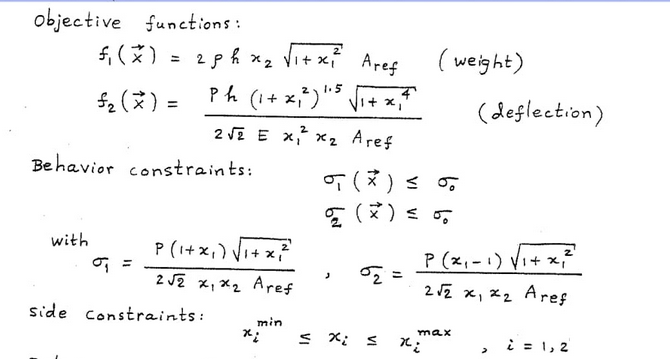

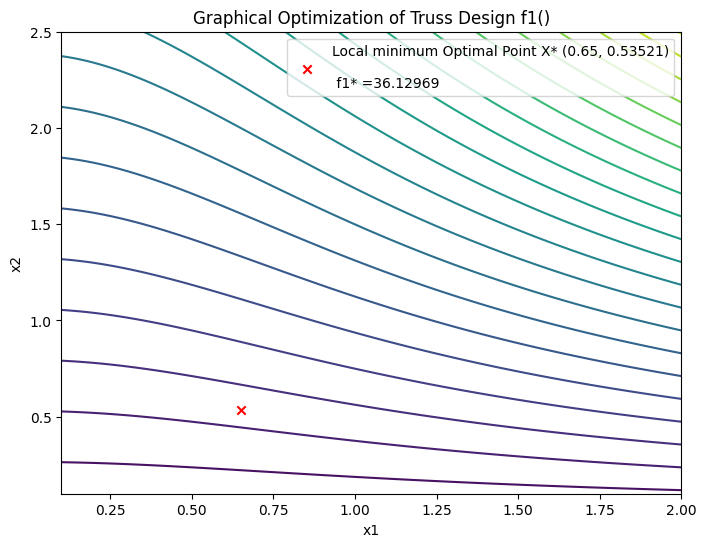

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem parameters
E = 30e6  # Young's modulus
rho = 0.283  # Weight density
P = 1000  # Applied load
sigma0 = 20000  # Permissible stress
Aref = 1  # Reference area
h = 100  # Height of the truss
xmin1 = 0.1
xmax1 = 2.0
xmin2 = 0.1
xmax2 = 2.5

def g1(X):
    x1, x2 = X[:, 0], X[:, 1]  
    return (P * (1 + x1) * np.sqrt(1 + x1**2)) / (2 * np.sqrt(2) * x1 * x2 * Aref) - sigma0

def g2(X):
    x1, x2 = X[:, 0], X[:, 1]  
    return (P * (x1 - 1) * np.sqrt(1 + x1**2)) / (2 * np.sqrt(2) * x1 * x2 * Aref) - sigma0

def f1(X):
    x1, x2 = X
    return 2 * rho * h * x2 * np.sqrt(1 + x1**2) * Aref

x1_vals = np.linspace(xmin1, xmax1, 100)
x2_vals = np.linspace(xmin2, xmax2, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

F1 = f1(np.array([X1, X2]))

feasible_region = np.logical_and(g1(np.stack((X1, X2), axis=-1)) <= 0,
                                  g2(np.stack((X1, X2), axis=-1)) <= 0)

plt.figure(figsize=(8, 6))
contour_levels = 20
plt.contour(X1, X2, F1, levels=contour_levels, cmap='viridis')

#plt.contourf(X1, X2, feasible_region, levels=[0, 1], cmap='Blues', alpha=0.3)

# Use plt.scatter to plot the design variables within the feasible region
plt.scatter(0.65, 0.53521, color='red', marker='x', label='Local minimum Optimal Point X* (0.65, 0.53521)\n \n f1* =36.12969 ')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Graphical Optimization of Truss Design f1()')
plt.legend()
plt.show()


# 1.35
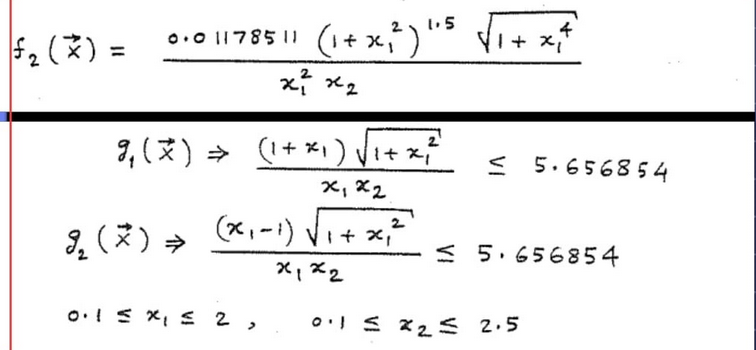

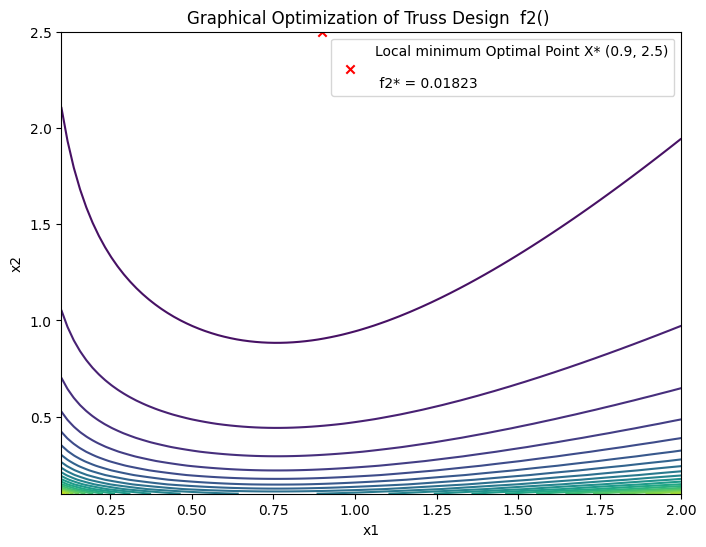

In [2]:
def f2(X):
    x1, x2 = X
    return (rho * (1 * x1)**1.5 * np.sqrt(1 + x1**4)) / (2 * np.sqrt(2) * E * x1**2 * x2 * Aref)


F2 = f2(np.array([X1, X2]))

feasible_region = np.logical_and(g1(np.stack((X1, X2), axis=-1)) <= 0,
                                  g2(np.stack((X1, X2), axis=-1)) <= 0)

plt.figure(figsize=(8, 6))
contour_levels = 20
plt.contour(X1, X2, F2, levels=contour_levels, cmap='viridis')

# Use plt.scatter to plot the design variables within the feasible region
plt.scatter(0.9, 2.5, color='red', marker='x', label='Local minimum Optimal Point X* (0.9, 2.5)\n \n f2* = 0.01823')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Graphical Optimization of Truss Design  f2() ')
plt.legend()
plt.show()


# 1.36
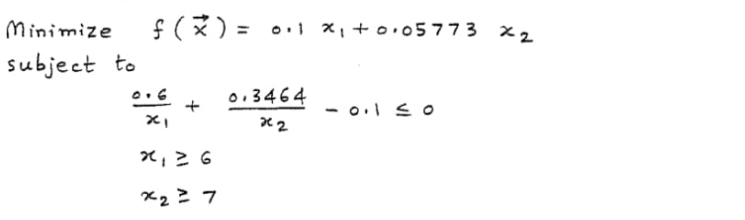

/tmp/ipykernel_475/2463771028.py:16: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, g1(X1, X2), levels=[0], colors='blue', label='g1: 0.6/x1 + 0.3464/x2 - 0.1 <= 0')


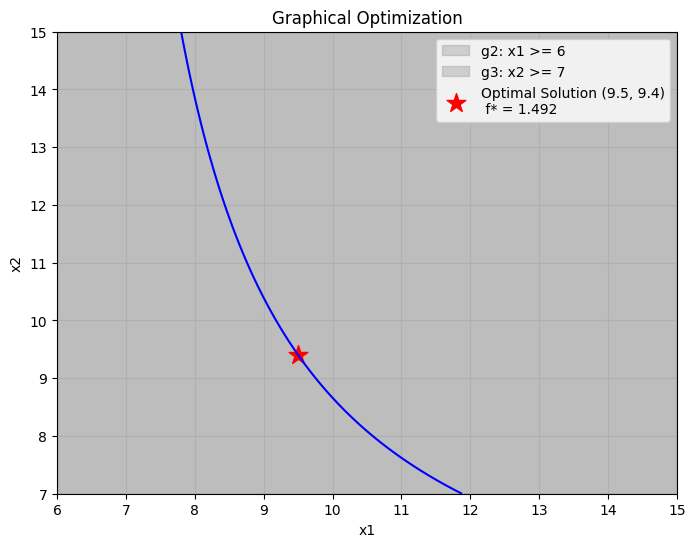

In [3]:

# Objective function
def fn(x1, x2):
    return 0.1 * x1 + 0.05773 * x2

# Constraints
def g1(x1, x2):
    return 0.6 / x1 + 0.3464 / x2 - 0.1

# Feasible region boundaries
x1_vals = np.linspace(6, 15, 100)
x2_vals = np.linspace(7, 15, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Plot feasible region
plt.figure(figsize=(8, 6))
plt.contour(X1, X2, g1(X1, X2), levels=[0], colors='blue', label='g1: 0.6/x1 + 0.3464/x2 - 0.1 <= 0')

# Plot horizontal fill for g2
plt.fill_between(x1_vals, 7, 15, where=(x1_vals >= 6), color='gray', alpha=0.3, label='g2: x1 >= 6')

# Plot vertical fill for g3
plt.fill_betweenx(x2_vals, 6, 15, where=(x2_vals >= 7), color='gray', alpha=0.3, label='g3: x2 >= 7')

# Optimal solution
plt.scatter(9.5, 9.4, color='red', marker='*', s=200, label='Optimal Solution (9.5, 9.4)\n f* = 1.492')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Graphical Optimization')
plt.legend()
plt.grid(True)
plt.show()
